In [102]:
import hist
import pickle as pkl
from unfold_utils.unfolderv3 import *
#import ipywidgets as widgets
#from IPython.display import display

from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *

In [103]:
%load_ext autoreload

%autoreload 2
%jsroot off

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-$\infty$ GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]
rlabel = r"137 $fb^{-1}$ (13 TeV)"

In [105]:
import mplhep as hep
hep.style.use("CMS")

In [106]:
from matplotlib.widgets import CheckButtons
closure  = False

groomed = False

In [107]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [108]:
# with open('latest_pkl/pythia_syst_0703.pkl', "rb") as f:
#     output_pythia= pkl.load( f )

with open('latest_pkl/pythia_1606_syst.pkl', "rb") as f:
    output_pythia= pkl.load( f )

# with open('latest_pkl/pythia_1006.pkl', "rb") as f:
#     output_pythia= pkl.load( f )

with open('latest_pkl/pythia_1606_syst.pkl', "rb") as f:
    output_miss= pkl.load( f )
    
# with open('latest_pkl/ungroomed_cracked_eta_test.pkl', "rb") as f:
#     output_pythia= pkl.load( f )
    
with open("latest_pkl/data_combined_1006.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/mc_herwig_1004.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
    output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_miss['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_miss['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/hist/basehist.py:417: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [109]:



reco_mass =18131231
gen_mass =16123123
start_mass = 0

# resp_matrix_4d = resp_matrix_4d[:, :, hist.rebin(2), :, :, :]
# input_data = input_data[:,  :, hist.rebin(2), ...]
# fakes = fakes[:,  :, hist.rebin(2), ...]
# misses = misses[:,  :, :, ...]
# hist_bg = hist_bg[:,  :, hist.rebin(2), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.rebin(2), :,: , ...]
# fakes_herwig = fakes_herwig[:,  :, hist.rebin(2), ...]
# misses_herwig = misses_herwig[:,  :, :, ...]



# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :, hist.loc(start_mass):hist.loc(gen_mass), :]
# input_data = input_data[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# fakes = fakes[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# misses = misses[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass) :hist.loc(gen_mass), :]
# input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]

resp_matrix_4d = resp_matrix_4d[:, :, :,hist.loc(start_mass) :hist.loc(reco_mass)+1, :,hist.loc(start_mass) :hist.loc(gen_mass)+1, :]
#input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...] # when categories are not present
input_data = input_data[:,  :, :, hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass)+1, ...]
hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
#resp_matrix_pythia = resp_matrix_pythia 
resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass)+1, :,hist.loc(start_mass): hist.loc(gen_mass)+1, ...]
fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass)+1, ...]





# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass):, :, hist.loc(start_mass):, :]
# input_data = input_data[:,  :, hist.loc(start_mass):, ...]
# fakes = fakes[:,  :, hist.loc(start_mass):, ...]
# misses = misses[:,  :,hist.loc(start_mass) :, ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):, ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass) :, :]
# input_data = input_data[:,  :,hist.loc(start_mass) :, ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :, ...]
# misses = misses[:,  :, hist.loc(start_mass):, ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :, ...]




In [110]:
if not groomed:
    # edges = [  0, 10, 2.0e+01, 30,   4.0e+01,
    #        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
    #        1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    # edges_gen = [ 0,   2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
    #        1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]

    edges = [ 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]
if groomed:
    edges = [ 0, 5, 10,  15, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0, 10, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]

    # edges = [ 2.0e+01, 30,   4.0e+01,
    #        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
    #        1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    # edges_gen = [ 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
    #        1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]

    


pt_edges = [200, 290, 400,  13000]

npt = len(pt_edges) - 1
nmreco = len(edges) -1
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptreco', pt_edges)
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptgen', pt_edges)

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'ptreco', pt_edges)
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'ptgen', pt_edges)




fakes =  rebin_hist(fakes, 'mreco',edges )
misses = rebin_hist(misses, 'mgen',edges_gen )

fakes = rebin_hist(fakes, 'ptreco', pt_edges)
#fakes = rebin_hist(fakes, 'ptgen', pt_edges)
#misses = rebin_hist(misses, 'ptreco', pt_edges)
misses = rebin_hist(misses, 'ptgen', pt_edges)

hist_bg = rebin_hist(hist_bg, 'ptreco', pt_edges)
#hist_bg = rebin_hist(hist_bg, 'ptgen', pt_edges)

hist_bg = rebin_hist(hist_bg, 'mreco',edges )


input_data = rebin_hist(input_data, 'ptreco', pt_edges)
#input_data = rebin_hist(input_data, 'ptgen', pt_edges)

input_data = rebin_hist(input_data, 'mreco',edges)

In [111]:
ptreco_center = resp_matrix_4d.axes['ptreco'].centers
ptreco_width = resp_matrix_4d.axes['ptreco'].widths
ptreco_edge = resp_matrix_4d.axes['ptreco'].edges

ptgen_center = resp_matrix_4d.axes['ptgen'].centers
ptgen_width = resp_matrix_4d.axes['ptgen'].widths
ptgen_edge = resp_matrix_4d.axes['ptgen'].edges
mreco_center = resp_matrix_4d.axes['mreco'].centers
mreco_edge = resp_matrix_4d.axes['mreco'].edges
mgen_center = resp_matrix_4d.axes['mgen'].centers

mreco_width = resp_matrix_4d.axes['mreco'].widths
mgen_width = resp_matrix_4d.axes['mgen'].widths
mgen_edge = resp_matrix_4d.axes['mgen'].edges

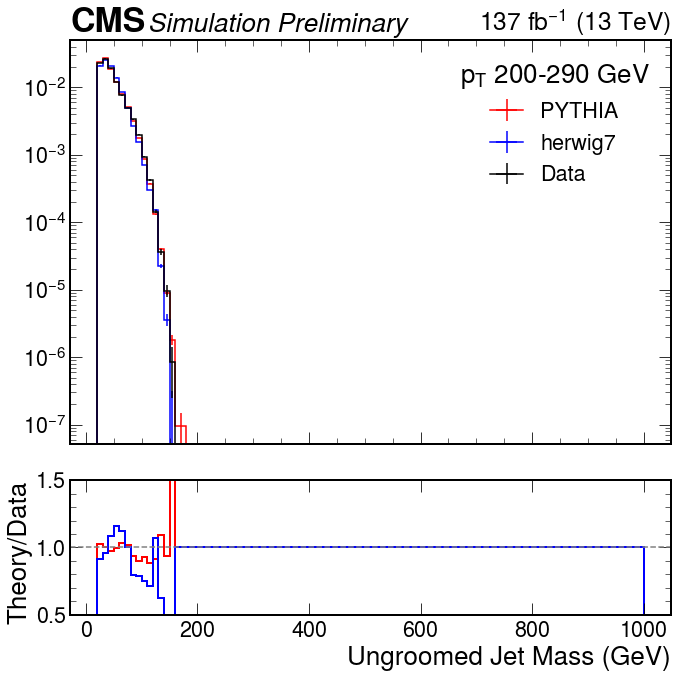

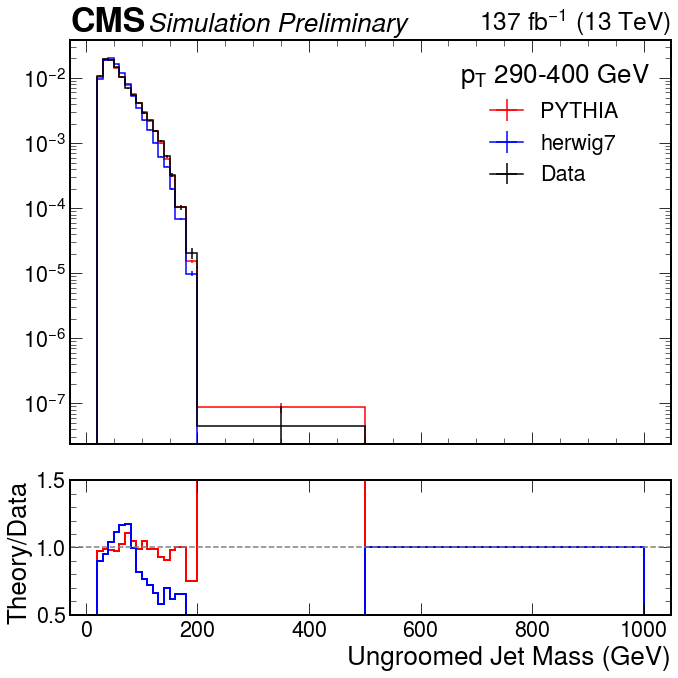

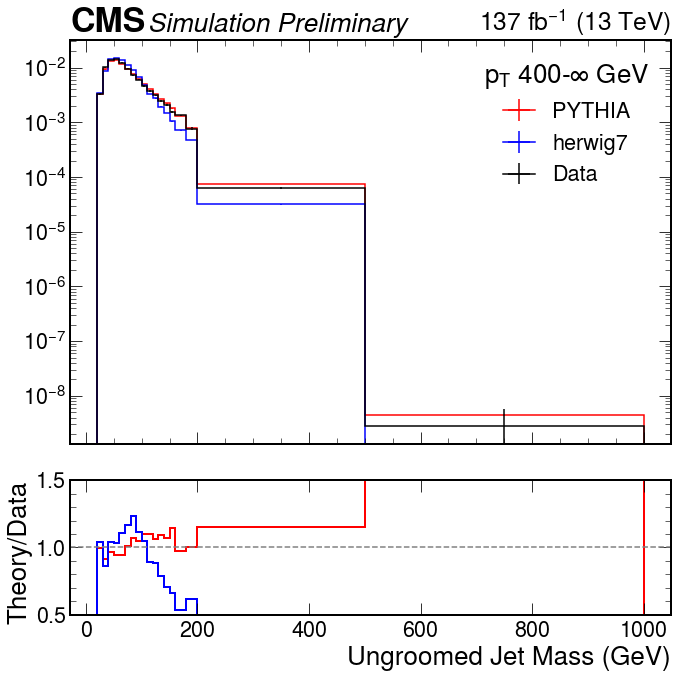

In [112]:
mreco_edge_new = mreco_edge.copy()
mreco_edge_new[-1] = 1000
for ipt in range(3):

    

    fig, (ax_main, ax_ratio) = plt.subplots(2, 1, sharex=True,
                                              
                                              gridspec_kw={'height_ratios': [3, 1]})
    
    mc_values = resp_matrix_4d.project('systematic','ptreco', 'mreco')['nominal',ipt, :].values()
    mc_values_norm = mc_values/mreco_width/mc_values.sum()
    mc_stat =  resp_matrix_4d.project('systematic','ptreco', 'mreco')['nominal',ipt, :].variances()**0.5
    mc_stat_norm = mc_stat/mreco_width/mc_values.sum()

    mc2_values = resp_matrix_4d_herwig.project('systematic','ptreco', 'mreco')['herwig',ipt, :].values()
    mc2_values_norm = mc2_values/mreco_width/mc2_values.sum()
    mc2_stat =  resp_matrix_4d_herwig.project('systematic','ptreco', 'mreco')['herwig',ipt, :].variances()**0.5
    mc2_stat_norm = mc2_stat/mreco_width/mc2_values.sum()

    
    data_values = input_data.project('ptreco', 'mreco')[ipt, :].values()
    data_values_norm = data_values/mreco_width/data_values.sum()
    data_stat = input_data.project('ptreco', 'mreco')[ipt, :].variances()**0.5
    data_stat_norm = data_stat/mreco_width/data_values.sum()


    ratio = np.divide(np.abs(mc_values_norm), np.abs(data_values_norm), out=np.ones_like(mc_values), where=data_values != 0)
    ratio2 = np.divide(np.abs(mc2_values_norm), np.abs(data_values_norm), out=np.ones_like(mc_values), where=data_values != 0)

    
    hep.histplot(mc_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'r',label = "PYTHIA", ax = ax_main)
    hep.histplot(mc2_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'b', label = "herwig7", ax = ax_main)
    hep.histplot(data_values_norm, mreco_edge_new, yerr = data_stat_norm, color = 'k', label = "Data", ax = ax_main)
    ax_main.set_yscale('log')


    
    
    plt.ylabel("#Events/GeV")
    ax_main.legend(title = title_list[ipt])
    xtick_labels = [str(int(tick)) for tick in mreco_edge_new]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)
    hep.cms.label("Preliminary", rlabel = rlabel, ax = ax_main)





    ax_ratio.stairs(ratio, mreco_edge_new, label="PYTHIA", color='r', lw= 2)
    ax_ratio.stairs(ratio2, mreco_edge_new, label="PYTHIA", color='b', lw= 2)
    ax_ratio.axhline(1, color='gray', linestyle='--')  # Reference line at 1

    if not groomed:
        ax_ratio.set_xlabel("Ungroomed Jet Mass (GeV)")
    else:
        ax_ratio.set_xlabel("Groomed Jet Mass (GeV)")
    
    ax_ratio.set_ylabel("Theory/Data")
    ax_ratio.set_ylim(0.5, 1.5)

    
    plt.tight_layout()


    if groomed:
        plt.savefig(f'plots/unfold/input_groomed_{ipt}.pdf')
    else:
        plt.savefig(f'plots/unfold/input_ungroomed_{ipt}.pdf')
    #plt.xticks(mreco_edge_new, xtick_labels)
    plt.show()

In [145]:
def append_latex_block(sys, groomed, first=False):
    # Set filenames based on groomed flag
    tag = "groomed" if groomed else "ungroomed"
    filenames = [f"figures/zplusjet/appendix/uncertainties/input_{tag}_{sys}_{i}.pdf" for i in range(3)]

    # Create caption and label
    caption = f"Nominal and systematic variations for different $p_T$ bins ({tag}, {sys})."
    label = f"fig:{tag}_{sys.lower()}"

    # Prepare LaTeX block
    latex_block = f"""
% Block for systematic {sys}
\\begin{{figure}}[htbp]
    \\centering

    \\includegraphics[width=0.31\\textwidth]{{{filenames[0]}}}
    \\hfill
    \\includegraphics[width=0.31\\textwidth]{{{filenames[1]}}}
    \\hfill
    \\includegraphics[width=0.31\\textwidth]{{{filenames[2]}}}

    \\caption{{{caption}}}
    \\label{{{label}}}
\\end{{figure}}
"""

    # Open file in write mode if first, append otherwise
    mode = "w" if first else "a"
    with open("plots/appendix/uncertainties/tex_scripts.tex", mode) as f:
        f.write(latex_block)


In [146]:
jes_sys_list = ['JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown',
                'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
                'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown',
                'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
                'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up',
                'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
                'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down',
                'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 
                'JES_RelativeStatECUp', 'JES_RelativeStatECDown', 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
                'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']


non_jes_sys_list = ['pu', 'elereco', 'eleid', 'eletrig', 'mureco', 'muid', 'mutrig', 'muiso', 'pdf', 'q2', 'prefiring', 'JER', 'JMR', 'JMS']



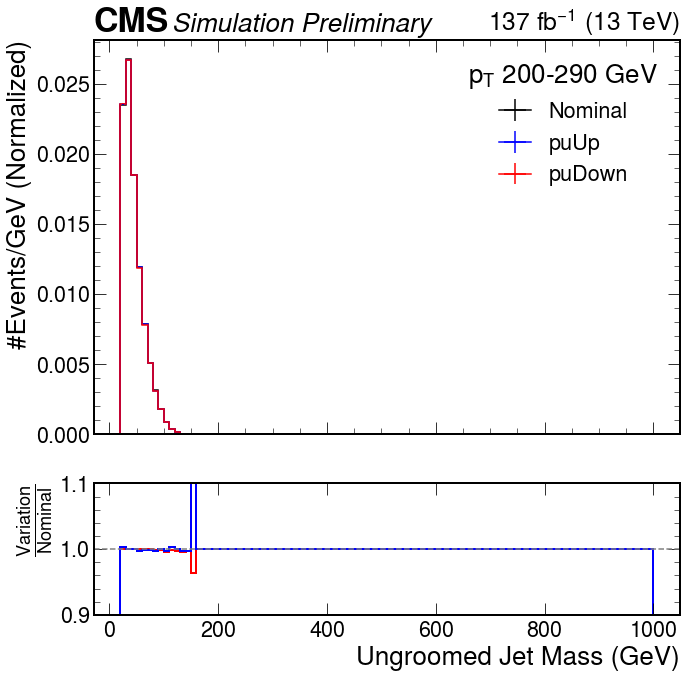

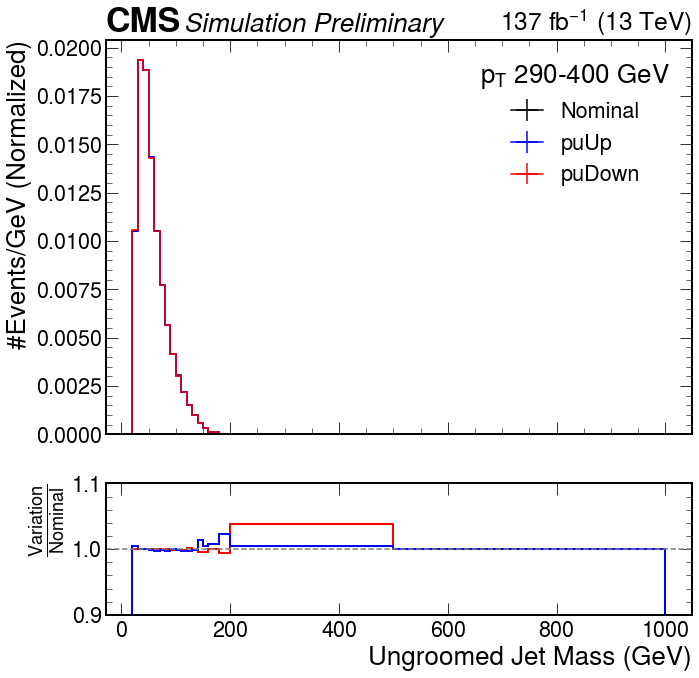

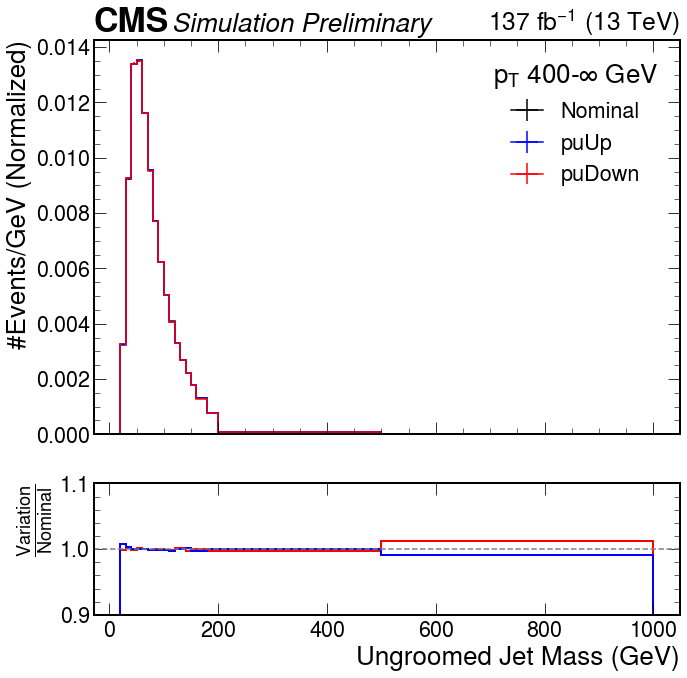

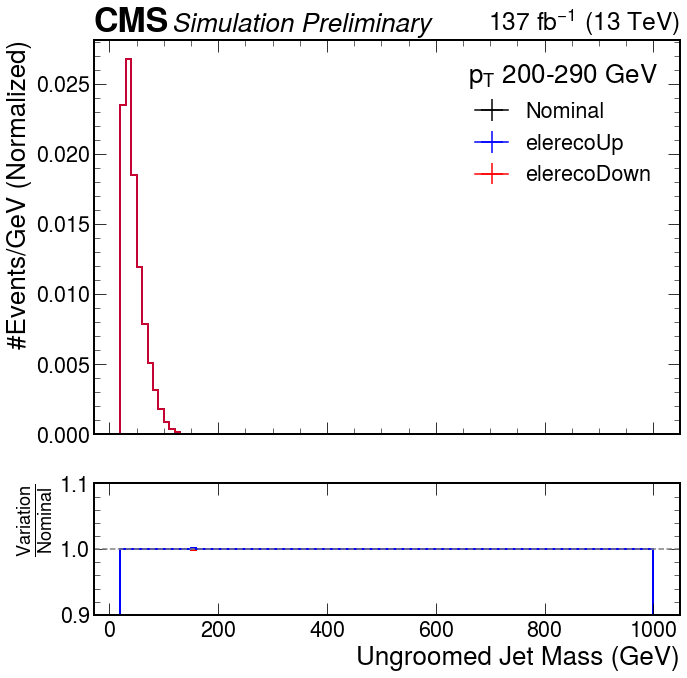

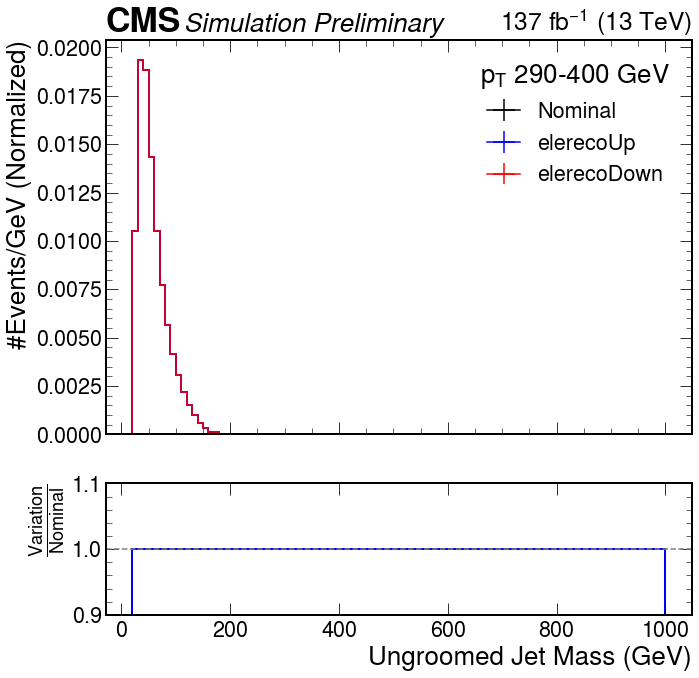

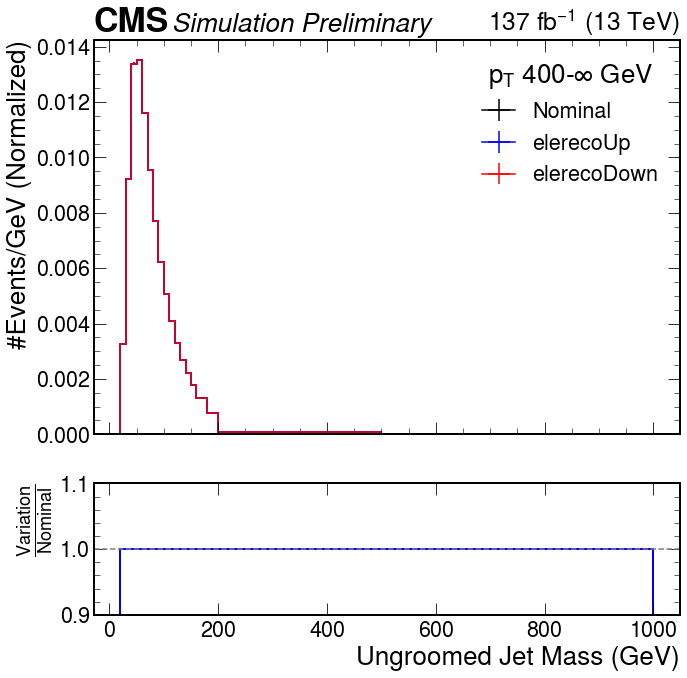

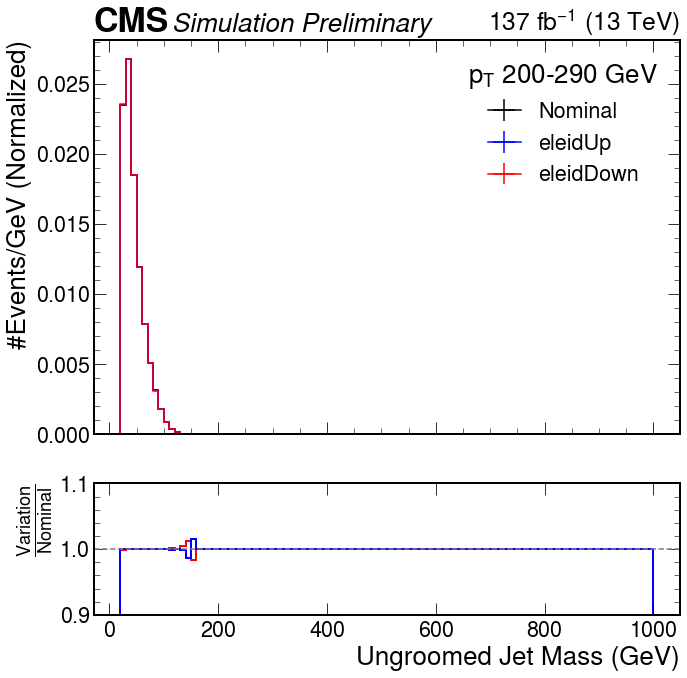

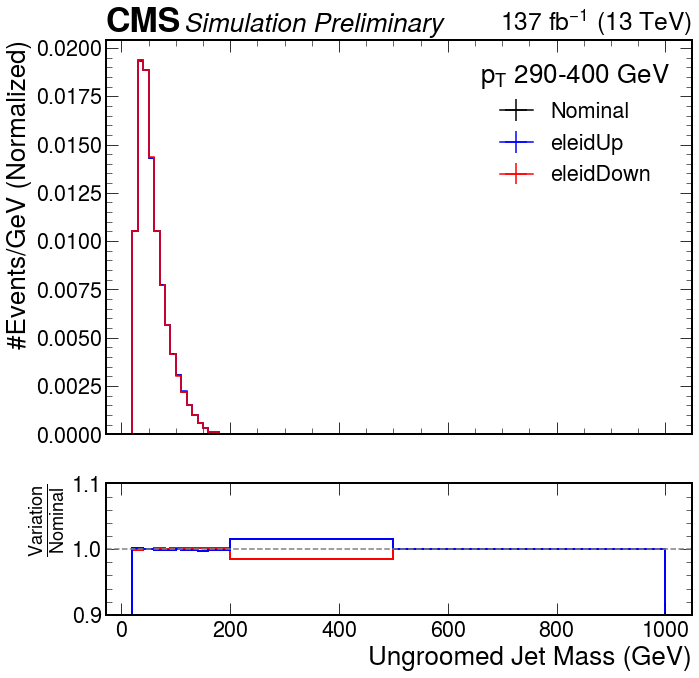

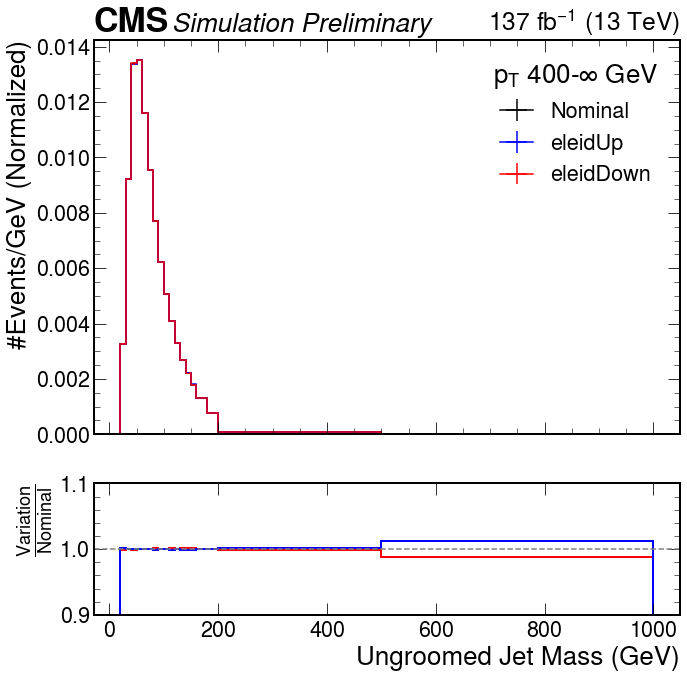

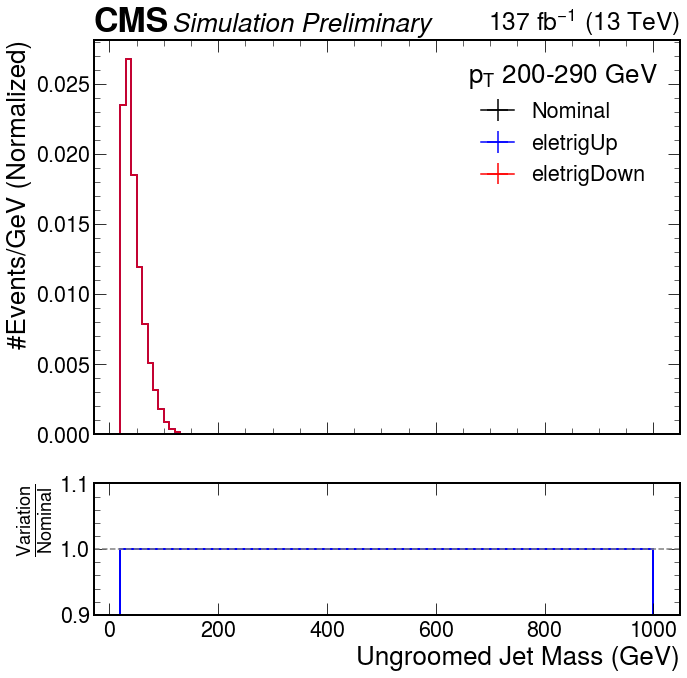

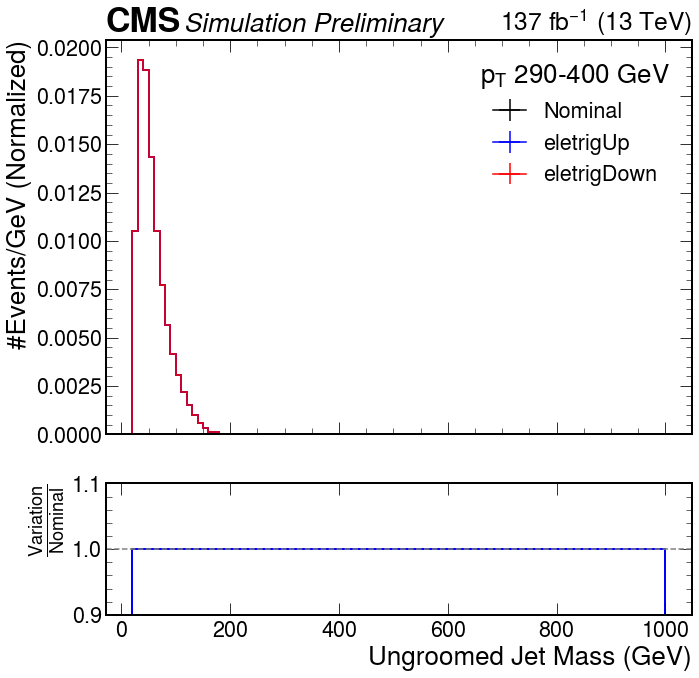

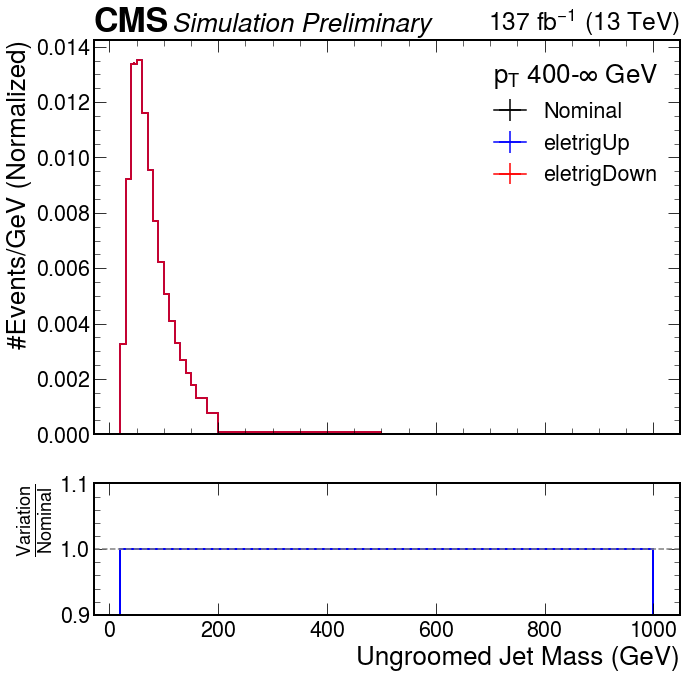

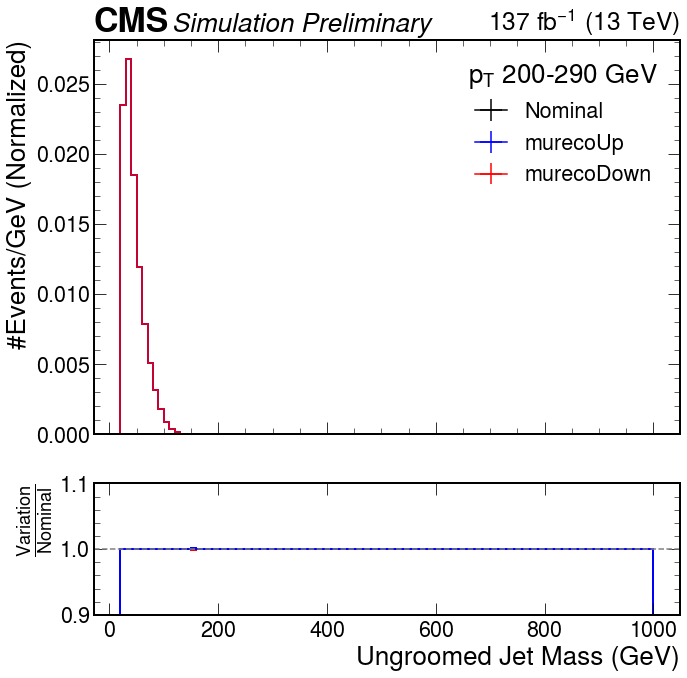

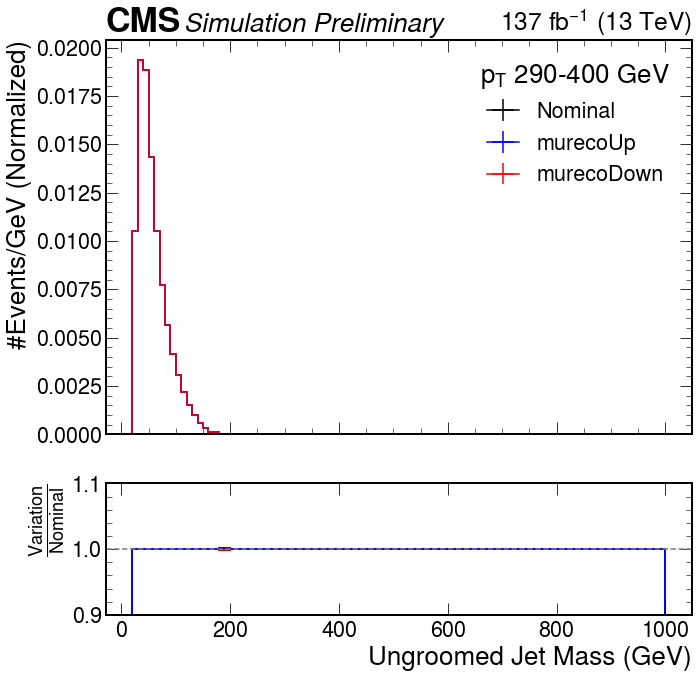

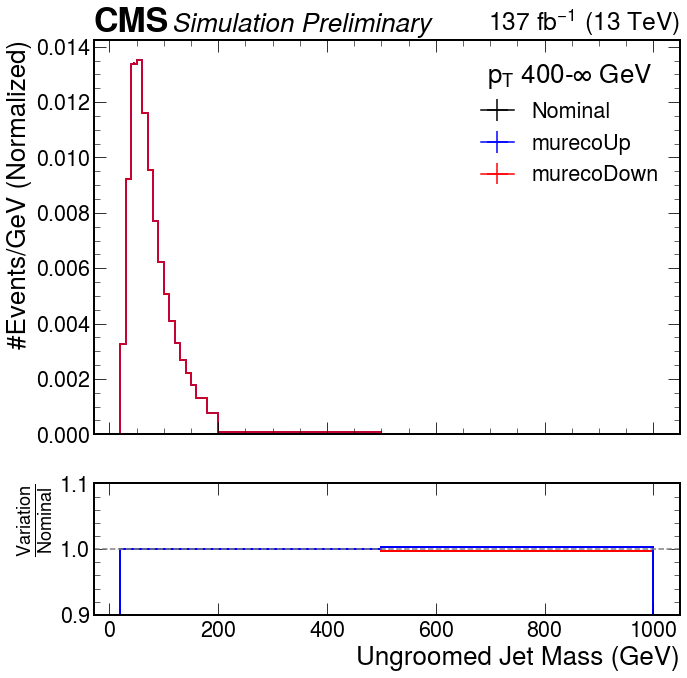

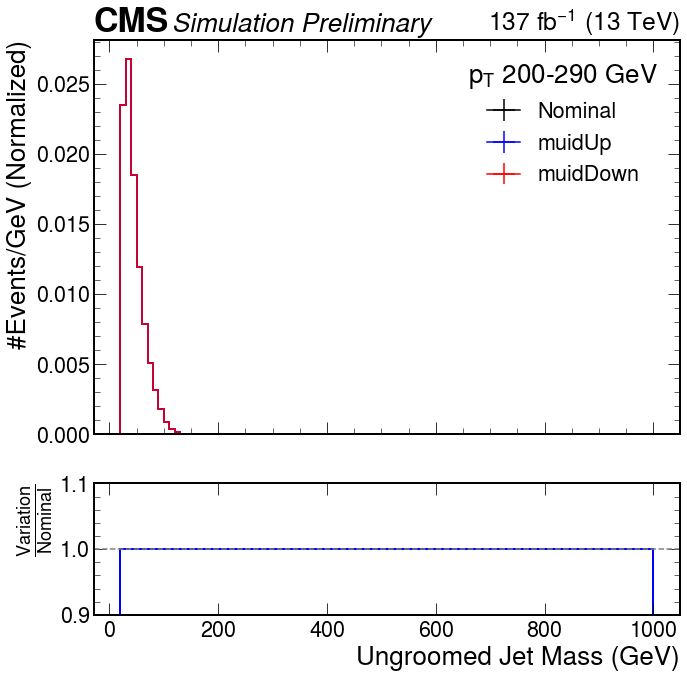

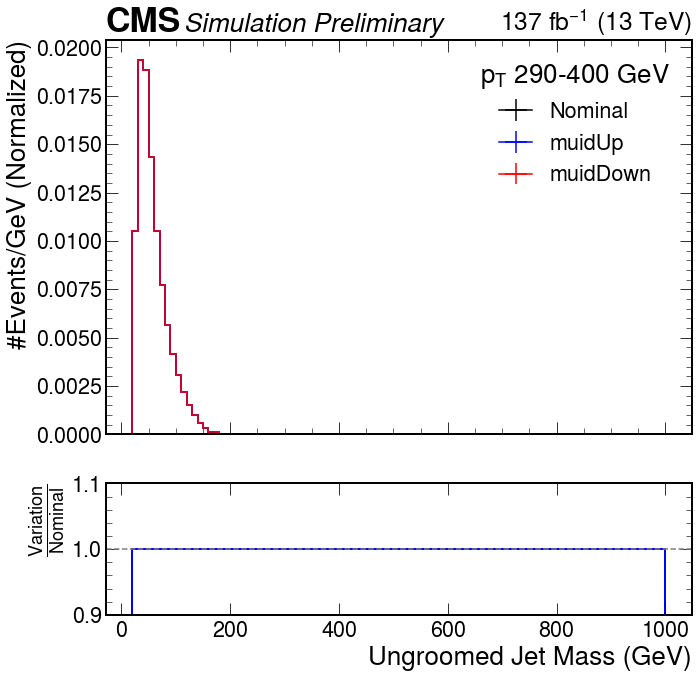

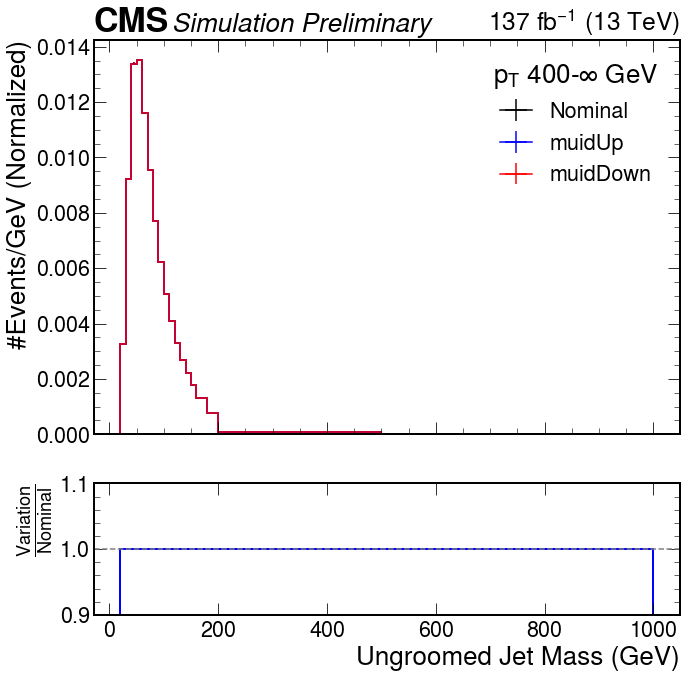

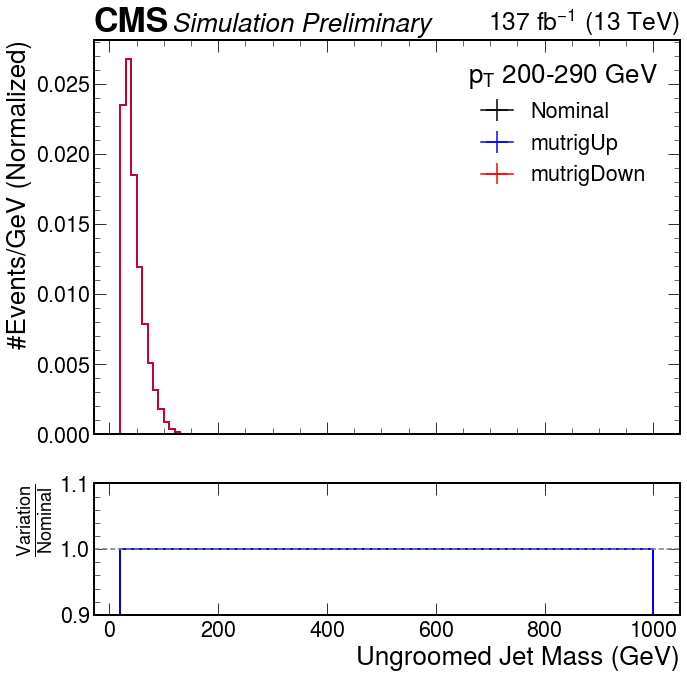

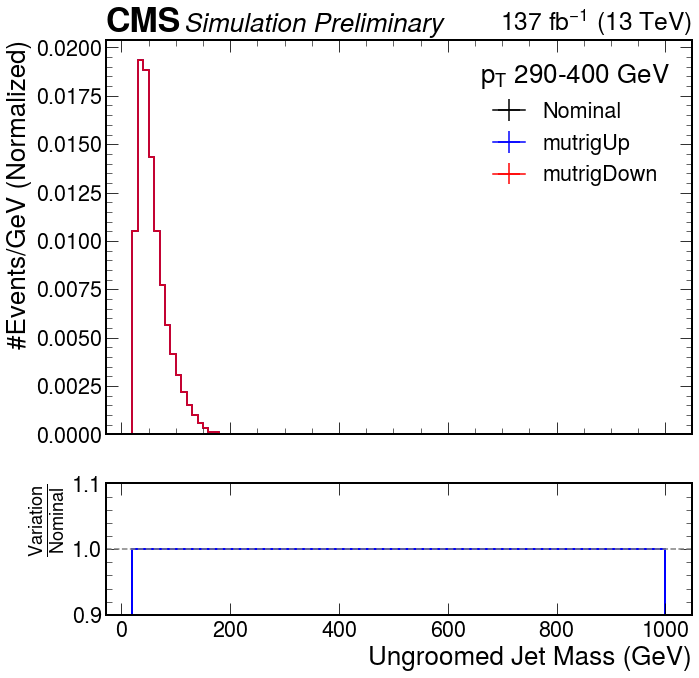

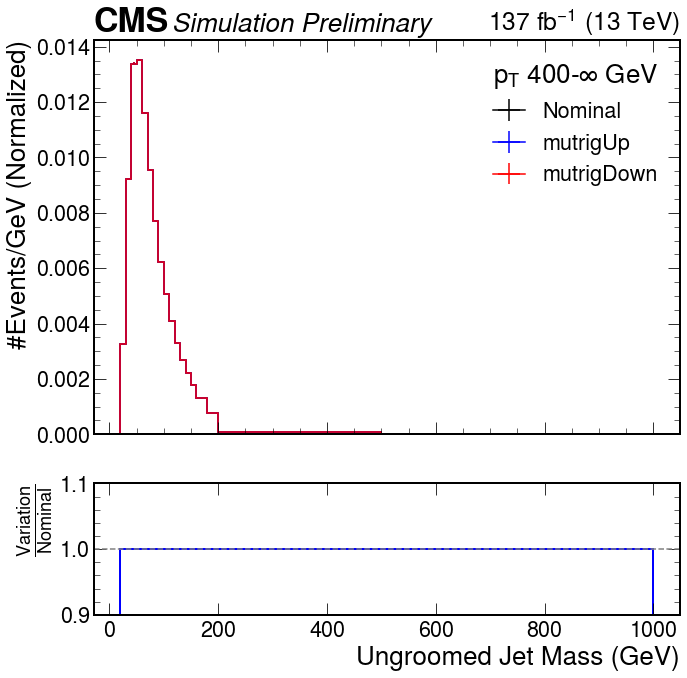

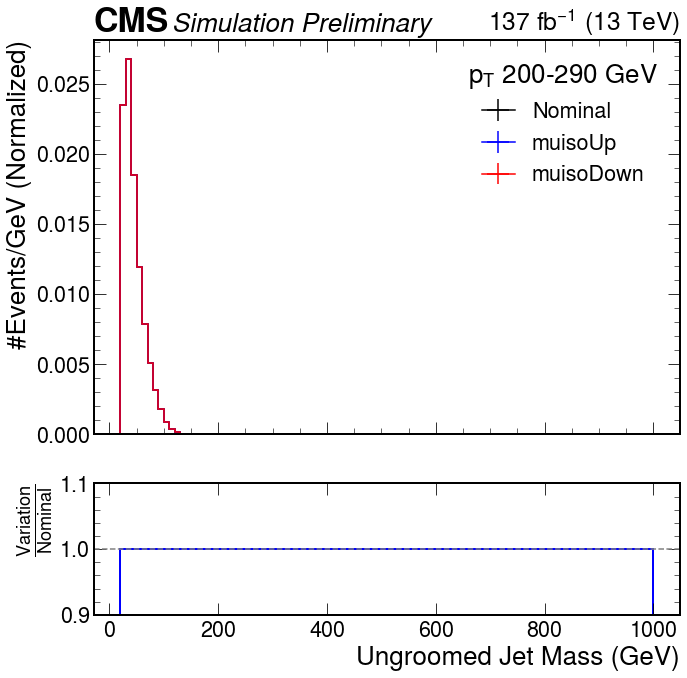

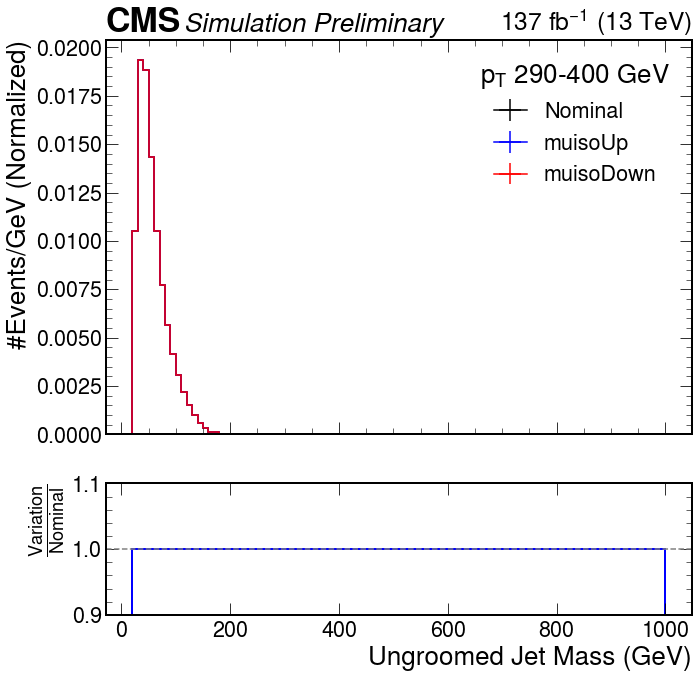

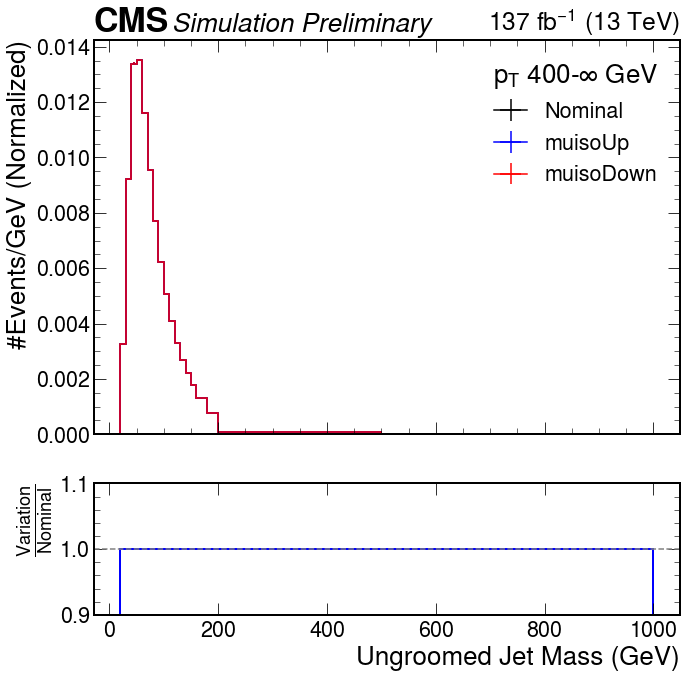

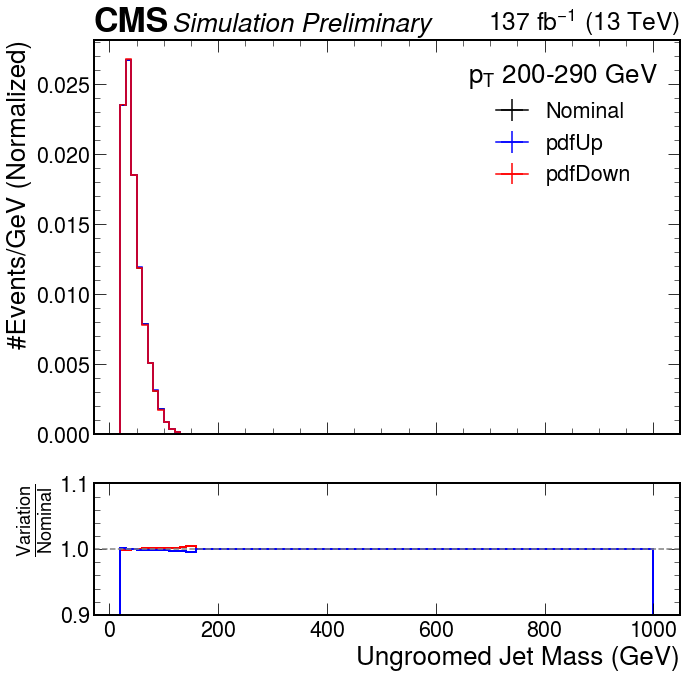

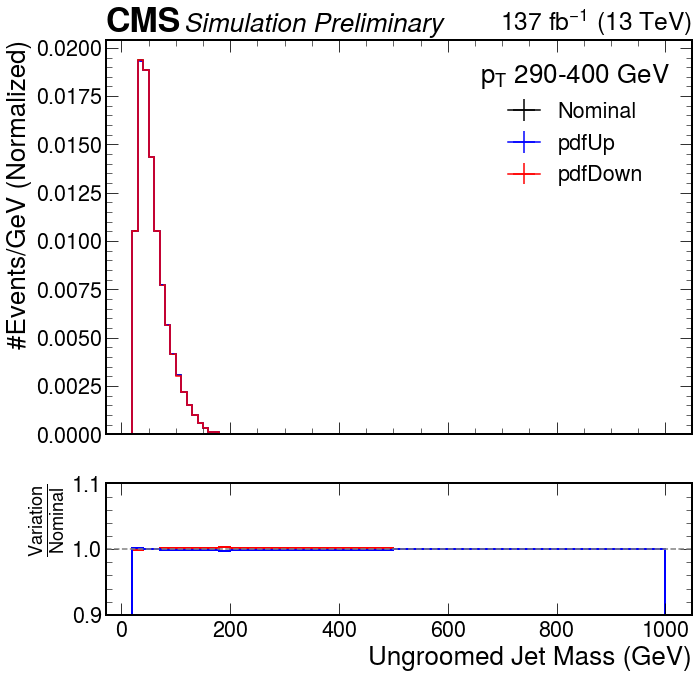

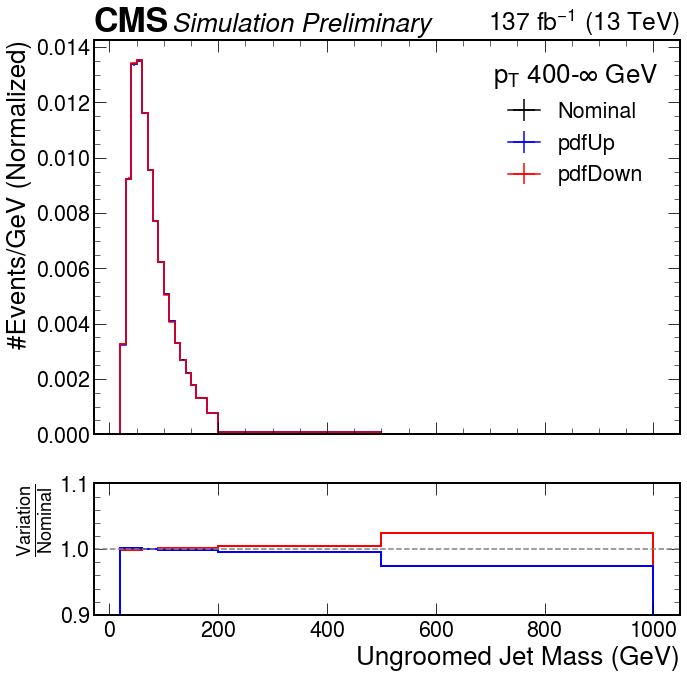

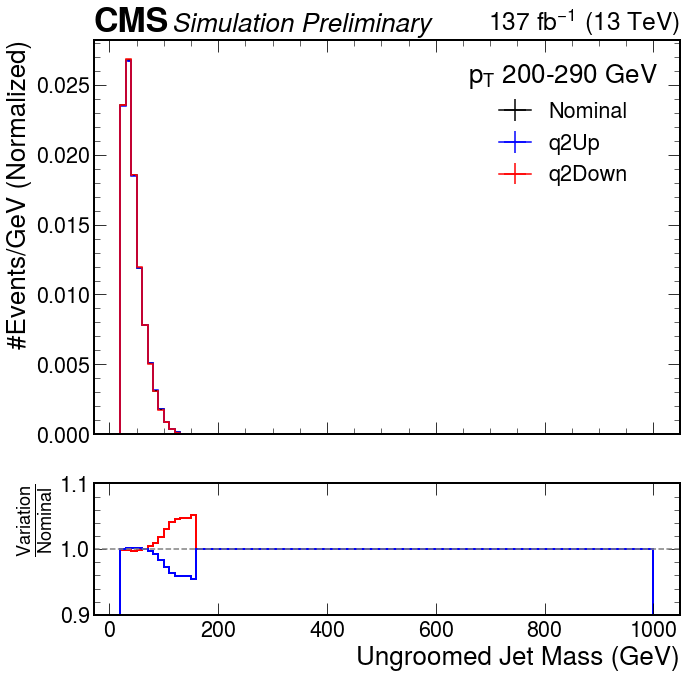

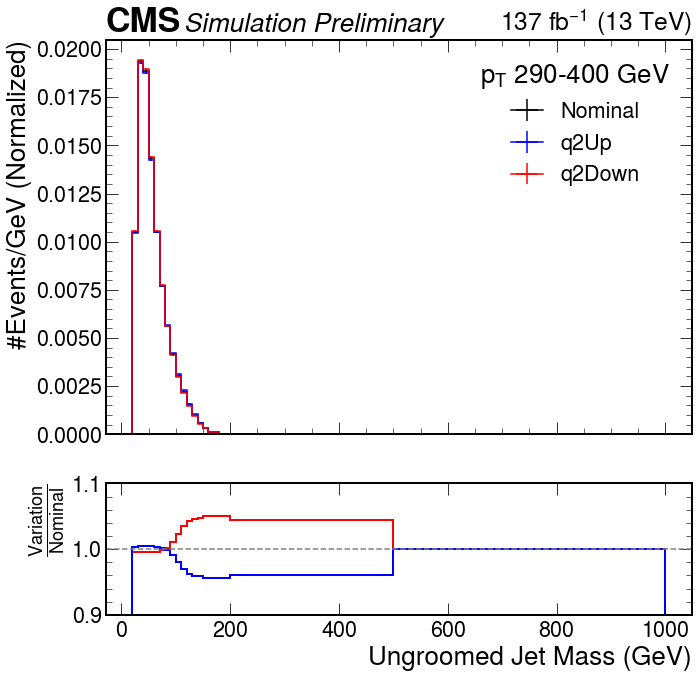

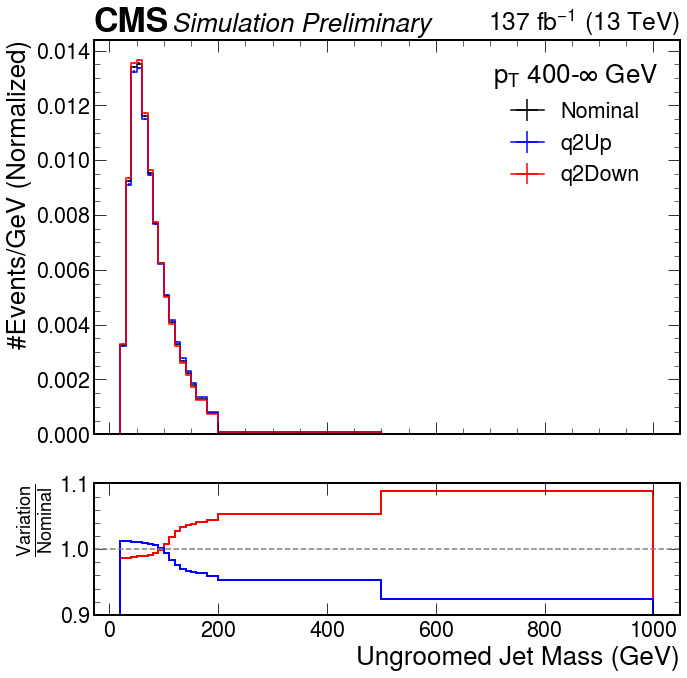

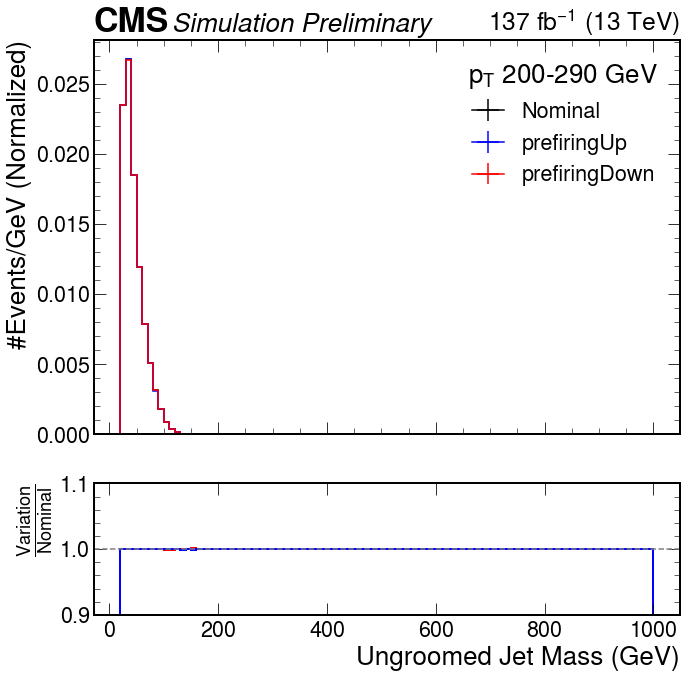

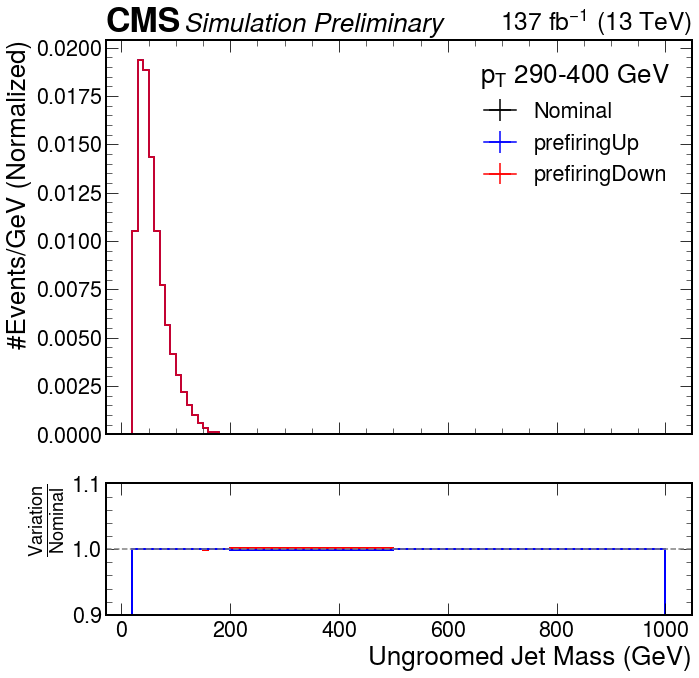

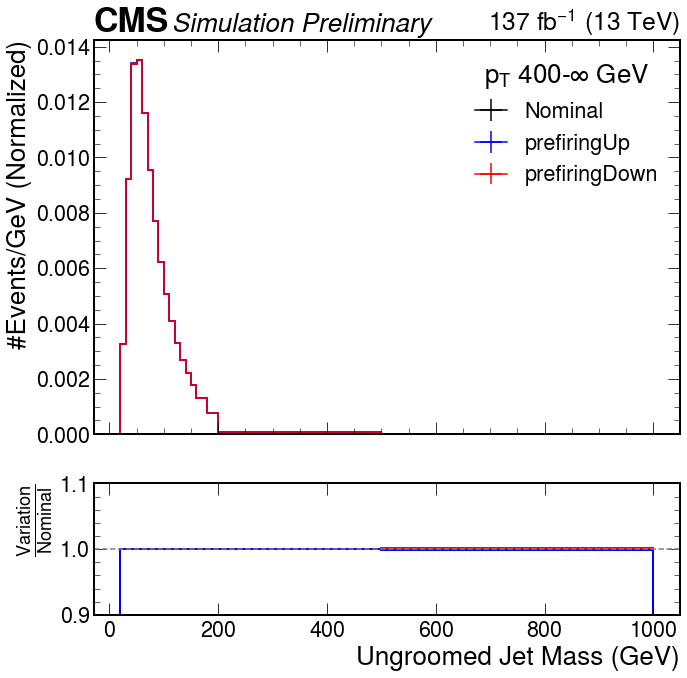

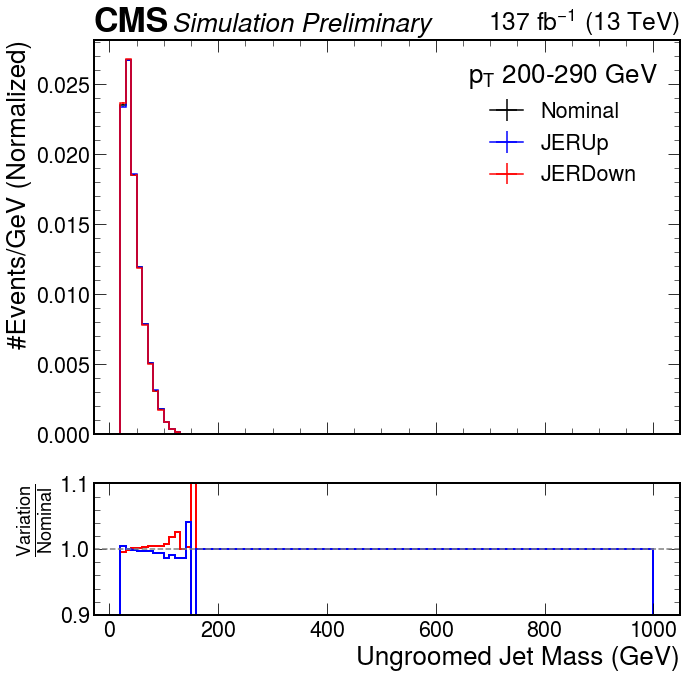

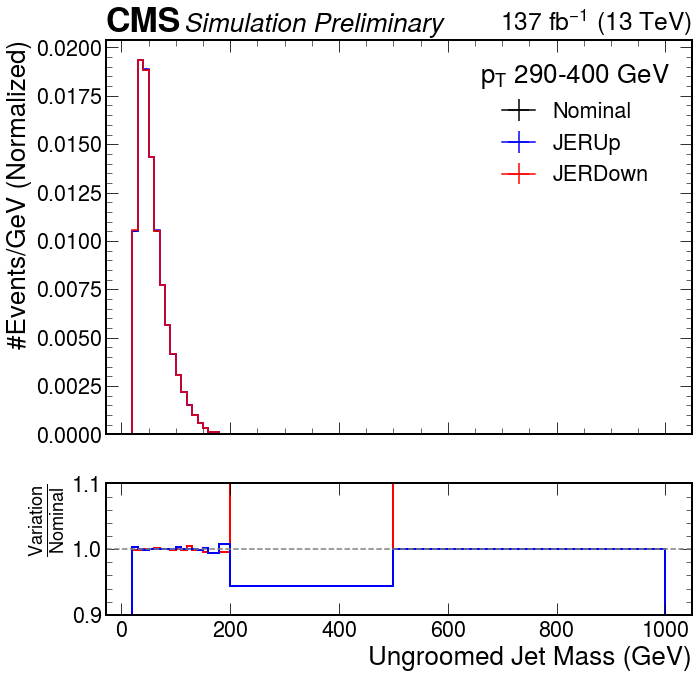

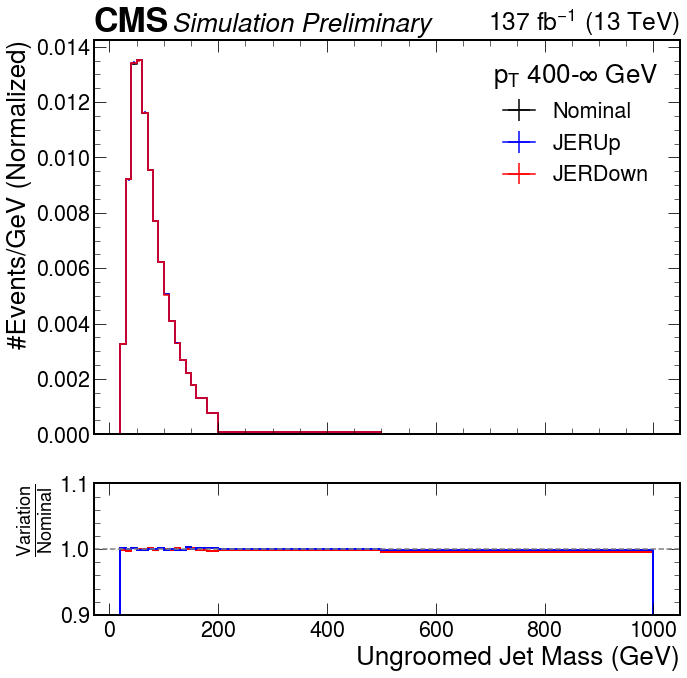

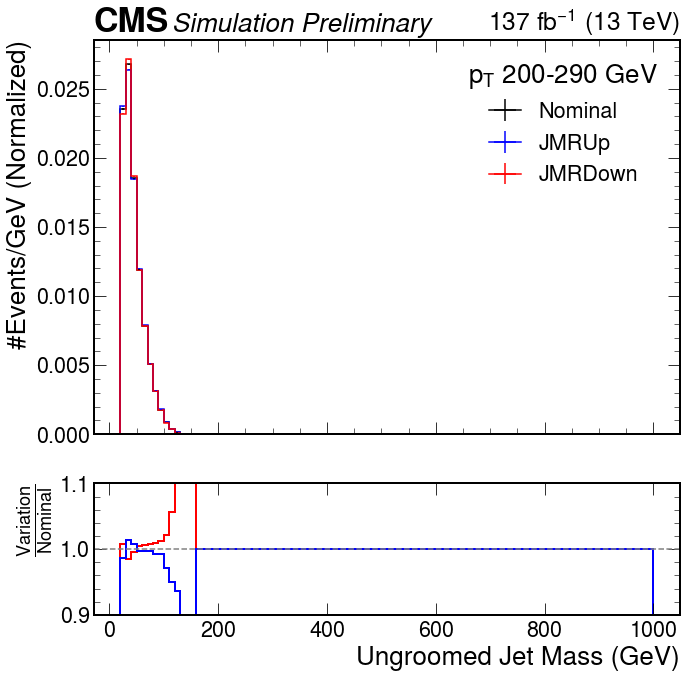

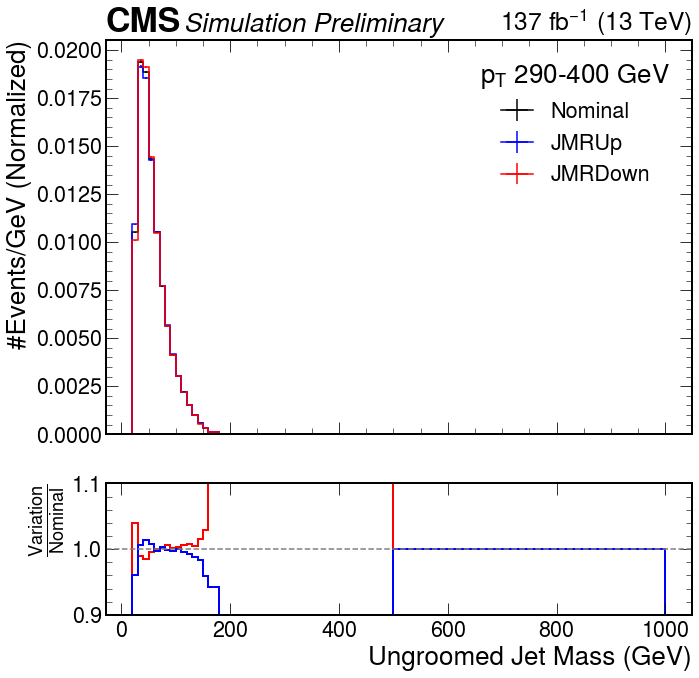

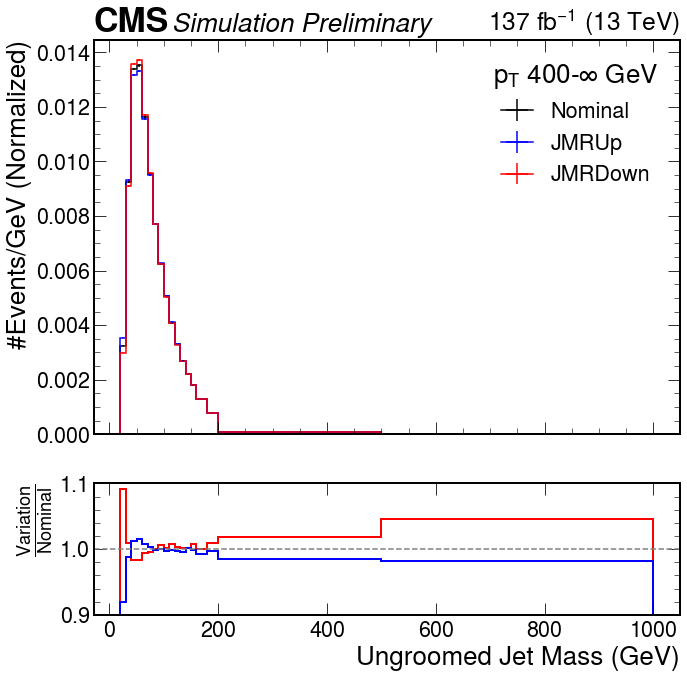

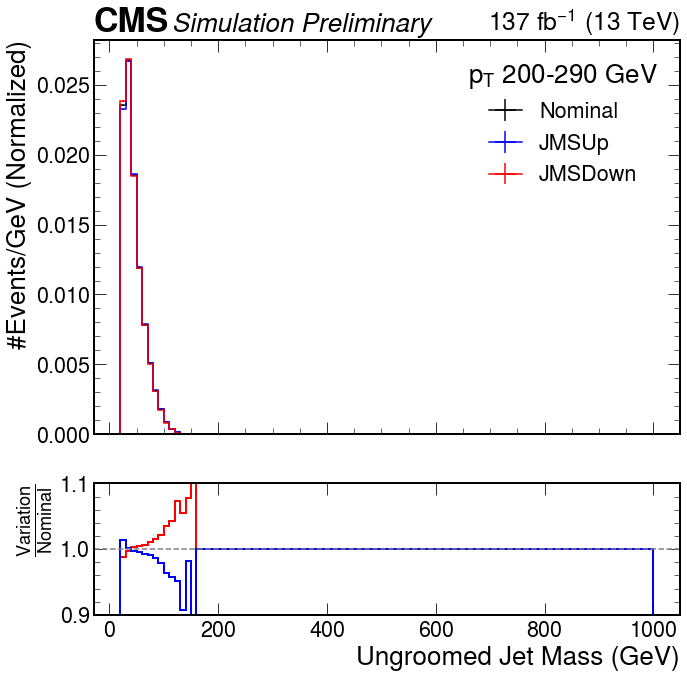

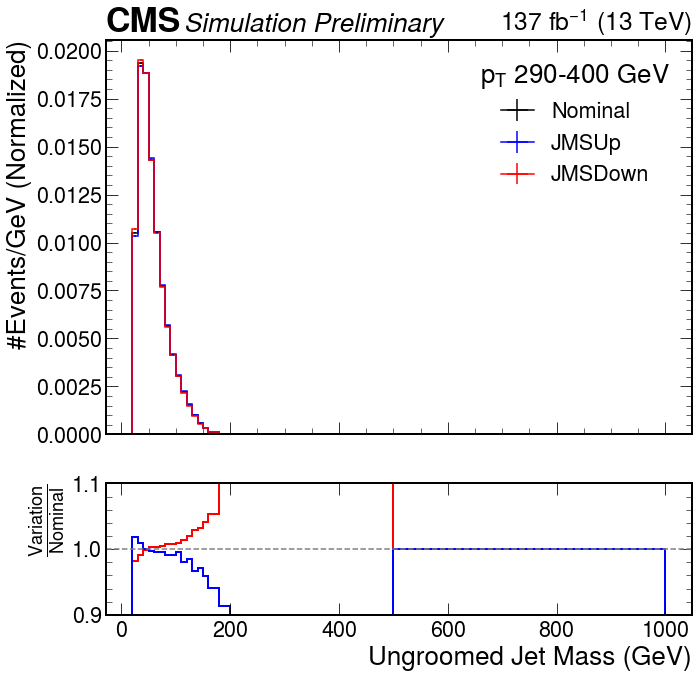

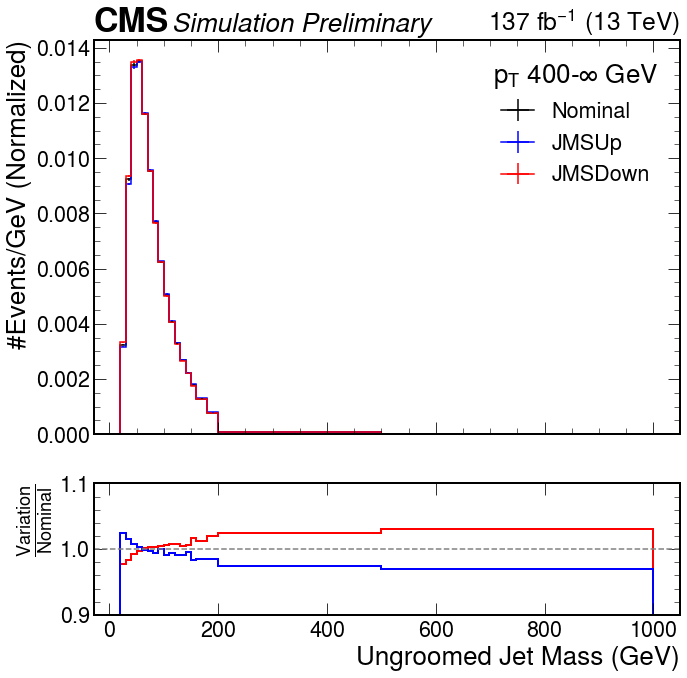

In [147]:
mreco_edge_new = mreco_edge.copy()
mreco_edge_new[-1] = 1000
first = True

for sys in non_jes_sys_list:
#sys = "JER"
    systematic = sys+'Up'
    systematic2 = sys+'Down'
    for ipt in range(3):
    
        
    
        fig, (ax_main, ax_ratio) = plt.subplots(2, 1, sharex=True,
                                                  
                                                  gridspec_kw={'height_ratios': [3, 1]})
        
        mc_values = resp_matrix_4d.project('systematic','ptreco', 'mreco')['nominal',ipt, :].values()
        mc_values_norm = mc_values/mreco_width/mc_values.sum()
        mc_stat =  resp_matrix_4d.project('systematic','ptreco', 'mreco')['nominal',ipt, :].variances()**0.5
        mc_stat_norm = mc_stat/mreco_width/mc_values.sum()
    
        mc2_values = resp_matrix_4d.project('systematic','ptreco', 'mreco')[systematic,ipt, :].values()
        mc2_values_norm = mc2_values/mreco_width/mc2_values.sum()
        mc2_stat =  resp_matrix_4d.project('systematic','ptreco', 'mreco')[systematic,ipt, :].variances()**0.5
        mc2_stat_norm = mc2_stat/mreco_width/mc2_values.sum()
    
        mc3_values = resp_matrix_4d.project('systematic','ptreco', 'mreco')[systematic2,ipt, :].values()
        mc3_values_norm = mc3_values/mreco_width/mc3_values.sum()
        mc3_stat =  resp_matrix_4d.project('systematic','ptreco', 'mreco')[systematic2,ipt, :].variances()**0.5
        mc3_stat_norm = mc3_stat/mreco_width/mc3_values.sum()
    
        
        data_values = input_data.project('ptreco', 'mreco')[ipt, :].values()
        data_values_norm = data_values/mreco_width/data_values.sum()
        data_stat = input_data.project('ptreco', 'mreco')[ipt, :].variances()**0.5
        data_stat_norm = data_stat/mreco_width/data_values.sum()
    
    
        ratio = np.divide(np.abs(mc2_values_norm), np.abs(mc_values_norm), out=np.ones_like(mc_values), where=data_values != 0)
        ratio2 = np.divide(np.abs(mc3_values_norm), np.abs(mc_values_norm), out=np.ones_like(mc_values), where=data_values != 0)
    
        
        hep.histplot(mc_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'k',label = "Nominal", ax = ax_main)
        hep.histplot(mc2_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'b', label = systematic, ax = ax_main)
        hep.histplot(mc3_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'r', label = systematic2, ax = ax_main)
        #hep.histplot(data_values_norm, mreco_edge_new, yerr = data_stat_norm, color = 'k', label = "Data", ax = ax_main)
        ax_main.set_yscale('linear')
    
    
        
        
        plt.ylabel("#Events/GeV")
        ax_main.legend(title = title_list[ipt])
        xtick_labels = [str(int(tick)) for tick in mreco_edge_new]  # Convert to string
        xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
        plt.tick_params(axis='x', which='minor', top=False, bottom=False)
        hep.cms.label("Preliminary", rlabel = rlabel, ax = ax_main)
    
    
    
    
    
        ax_ratio.stairs(ratio, mreco_edge_new, label="PYTHIA", color='r', lw= 2)
        ax_ratio.stairs(ratio2, mreco_edge_new, label="PYTHIA", color='b', lw= 2)
        ax_ratio.axhline(1, color='gray', linestyle='--')  # Reference line at 1
    
        if not groomed:
            ax_ratio.set_xlabel("Ungroomed Jet Mass (GeV)")
        else:
            ax_ratio.set_xlabel("Groomed Jet Mass (GeV)")
        
        ax_ratio.set_ylabel(r"$\frac{Variation}{Nominal}$")
        ax_ratio.set_ylim(0.9, 1.1)
    
        
        plt.tight_layout()
    
        ax_main.set_ylabel("#Events/GeV (Normalized)")
        if groomed:
            plt.savefig(f'plots/appendix/uncertainties/input_groomed_{sys}_{str(ipt)}.pdf')
        else:
            plt.savefig(f'plots/appendix/uncertainties/input_ungroomed_{sys}_{str(ipt)}.pdf')
        plt.show()
    append_latex_block(sys = sys, groomed = groomed, first = first)
    first = False
    


In [115]:
plot_ratio()

TypeError: plot_ratio() missing 5 required positional arguments: 'output_data', 'output_sys', 'mgen_edge', 'label1', and 'label2'